<a href="https://colab.research.google.com/github/chonzadaniel/pytorch-deep-learning/blob/main/04_pytorch_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets

Already familiar with PyTorch datasets before.

But how do you own data into PyTorch?

One of the ways to do so is via: custom datasets.

**Domain libraries**

Depending on the project, vision, text, audio, recommendations, you'll want to look into each of the PyTorch domain libraries for existing data loading functions and customizable data loading functions.

**Resources:**
* Book version of the course materials for 04: https://www.learnpytorch.io/04_pytorch_custom_datasets/
* Ground truth vesion of notebook 04: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/04_pytorch_custom_datasets.ipynb

## 0. Importing PyTorch and setting up device-agnostic code

In [946]:
import torch
from torch import nn


# Note: PyTorch 1.10.0+ is required for this task
torch.__version__

'2.3.0+cu121'

In [947]:
# Setup device-agnostic-code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [948]:
!nvidia-smi

Sat May 25 19:14:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0              29W /  70W |  11859MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## 1. Get Data

The dataset is a subset of the Food101 dataset.

Food101 starts 101 different classes of food.

For this assignment, dataset starts with 3 classes of food and only 10% of the images (-75 training, 25 testing).

Why do this?

When starting our ML projects, it's important to try things on a small scale and then increase when necessary.

The whole point is to speed up how fast the project can computationally work.

In [949]:
import requests
import zipfile # To open the zipped files from the source
from pathlib import Path

# Setup path to a data folder

data_path = Path("data")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it.....
if image_path.is_dir():
    print(f"{image_path} directory already exists.... skipping download")
else:
    print(f"{image_path} does not exist, creating one....")
    image_path.mkdir(parents=True, exist_ok=True)


# Downloading pizza, steak, and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data....")
    f.write(request.content)

# Unzip pizza, steak, and sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, and sushi data....")
    zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exists.... skipping download
Unzipping pizza, steak, and sushi data....


## 2. Becoming one with the data (data preparation and data exploration/Exploratory Data Analysis-EDA)

In [950]:
import os
def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [951]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.


In [952]:
# Setup train and testing paths

train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing and image

Below is a come to:

1. Get all of the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since the problem is for image classification, Python's PIL is used to open images.
5. Visualize images and metadata

Random image path: data/pizza_steak_sushi/train/steak/830007.jpg
Image class: steak
Image height: 287
Image width: 512


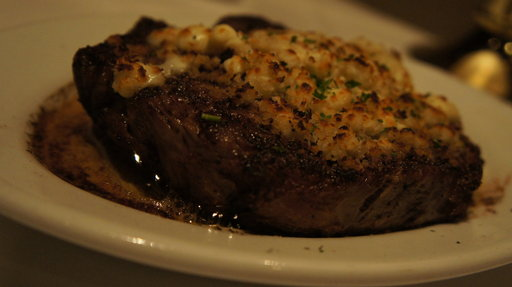

In [953]:
# /content/data/pizza_steak_sushi

import random
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)


# 3. Get image class from path name (the image class is the name of the directory where the
image_class = random_image_path.parent.stem


# 4. Open image metadata
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

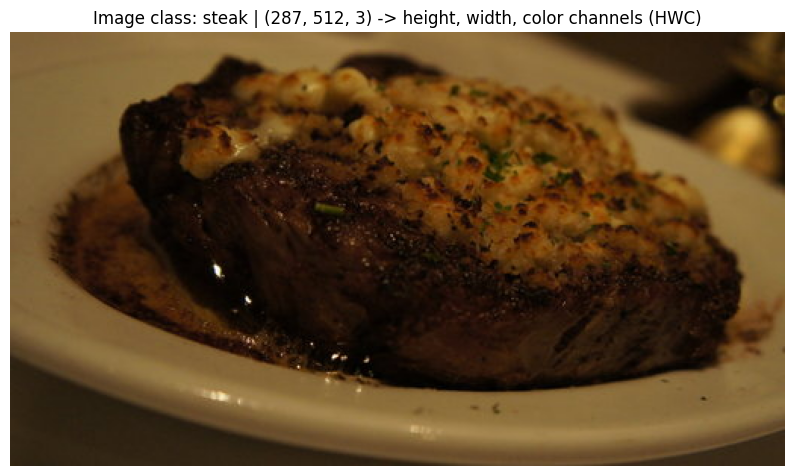

In [954]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | {img_as_array.shape} -> height, width, color channels (HWC)")
plt.axis(False);

array([[[127,  98,  56],
        [127,  98,  56],
        [127,  98,  56],
        ...,
        [ 62,  41,  14],
        [ 57,  37,  12],
        [ 54,  34,  10]],

       [[127,  98,  56],
        [127,  98,  56],
        [127,  98,  56],
        ...,
        [ 61,  39,  15],
        [ 55,  35,  10],
        [ 52,  32,   8]],

       [[127,  98,  56],
        [127,  98,  56],
        [127,  98,  56],
        ...,
        [ 59,  37,  13],
        [ 53,  33,   8],
        [ 49,  29,   5]],

       ...,

       [[ 51,  38,  19],
        [ 51,  38,  19],
        [ 50,  37,  18],
        ...,
        [ 56,  41,  22],
        [ 57,  40,  22],
        [ 57,  40,  22]],

       [[ 52,  39,  20],
        [ 51,  38,  19],
        [ 50,  37,  18],
        ...,
        [ 56,  41,  22],
        [ 57,  40,  22],
        [ 57,  40,  22]],

       [[ 52,  40,  18],
        [ 51,  39,  17],
        [ 50,  37,  18],
        ...,
        [ 56,  41,  22],
        [ 57,  40,  22],
        [ 57,  40,  22]]], dtype=uint8)
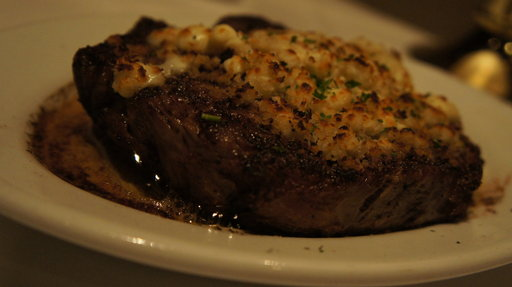

In [955]:
img_as_array

## 3. Transforming data

Before image used with PyTorch:
1. Turn target data into tensors which ensures images in numerical representation.
2. Turn it into a `torch.utils.data.Dataset`and subsequently a `torch.utils.data.DataLoader` i.e. called Dataset and DataLoader


In [956]:
# Importing dependencies

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import v2

### 3.1 Transforming data with `torchvision.transforms`

In [957]:
# Wirte a transform for image
data_transform = transforms.Compose([
    # Resize our images to 224 x224
    transforms.Resize((224, 224)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [958]:
data_transform(img)

tensor([[[0.4980, 0.4980, 0.4980,  ..., 0.3137, 0.2627, 0.2196],
         [0.4980, 0.4980, 0.4980,  ..., 0.3098, 0.2549, 0.2118],
         [0.4980, 0.4980, 0.4980,  ..., 0.2980, 0.2431, 0.1961],
         ...,
         [0.2000, 0.1961, 0.1922,  ..., 0.2196, 0.2196, 0.2235],
         [0.2000, 0.1922, 0.1922,  ..., 0.2196, 0.2196, 0.2235],
         [0.2000, 0.1922, 0.1922,  ..., 0.2196, 0.2196, 0.2235]],

        [[0.3843, 0.3843, 0.3843,  ..., 0.2157, 0.1725, 0.1412],
         [0.3843, 0.3843, 0.3843,  ..., 0.2078, 0.1686, 0.1333],
         [0.3843, 0.3843, 0.3843,  ..., 0.2000, 0.1608, 0.1216],
         ...,
         [0.1490, 0.1451, 0.1412,  ..., 0.1608, 0.1608, 0.1569],
         [0.1490, 0.1412, 0.1412,  ..., 0.1608, 0.1608, 0.1569],
         [0.1529, 0.1412, 0.1412,  ..., 0.1608, 0.1608, 0.1569]],

        [[0.2196, 0.2196, 0.2196,  ..., 0.0745, 0.0588, 0.0431],
         [0.2196, 0.2196, 0.2196,  ..., 0.0706, 0.0588, 0.0353],
         [0.2196, 0.2196, 0.2196,  ..., 0.0627, 0.0510, 0.

In [959]:
data_transform(img).shape

torch.Size([3, 224, 224])

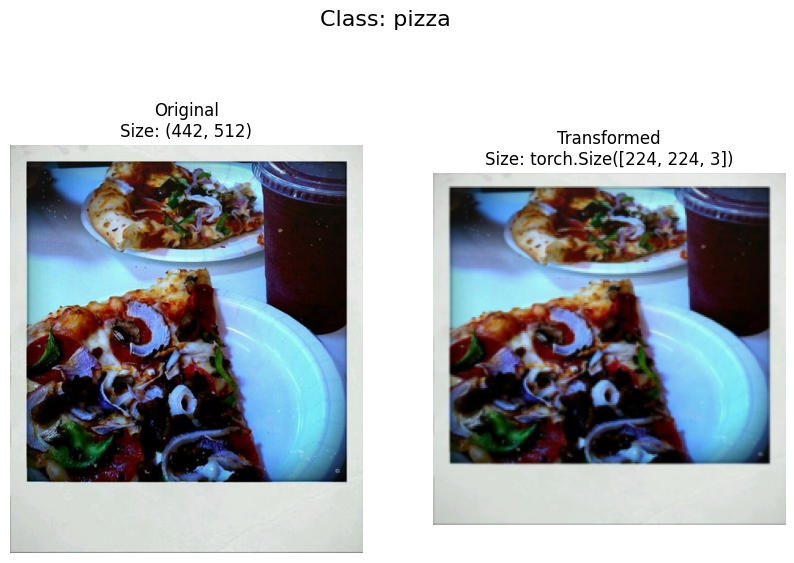

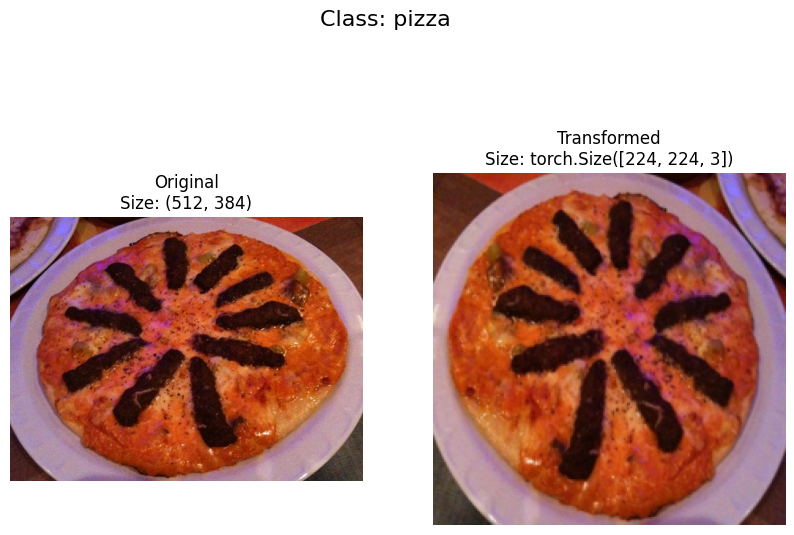

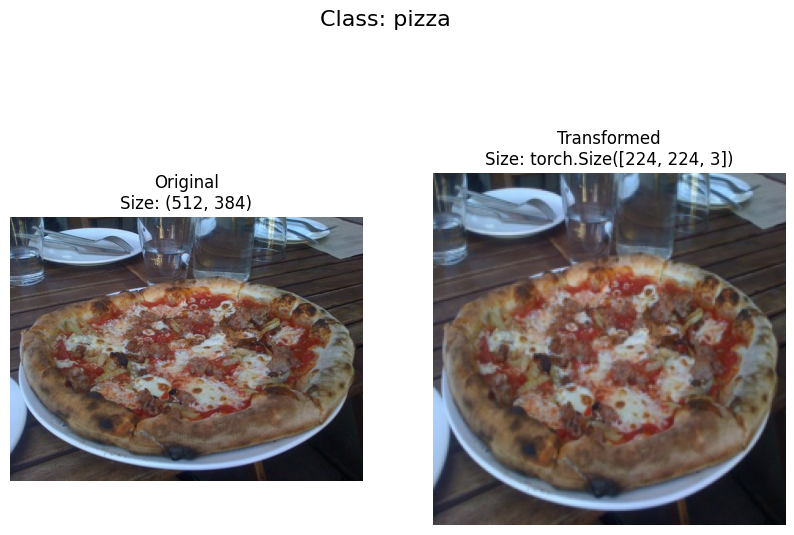

In [960]:
# Visualizing the transformed image

def plot_transformed_images(image_path: list, transform, n=3, seed=None):
    """
    Selects images randomly from a path of images and loads/transforms them then plots the original vs the transformed versions.
    """
    if seed:
        random.seed(seed)

    # Get random image
    random_image_path = random.sample(image_path, k=n)
    for image_path in random_image_path:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2, figsize=(10, 7))
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            # Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0) # note: will change shape for matplotlib [CHW -> HWC format]
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)

## 4. Option 1: Loading image data using `ImageFolder`

Image classification data could be loaded using `torchvision.datasets.ImageFolder` - https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html#torchvision.datasets.ImageFolder

In [961]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # a transform for the data
                                  target_transform=None) # a transform for the label/target

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [962]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [963]:
# Get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [964]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [965]:
# Check the length of our dataset
len(train_data), len(test_data)

(225, 75)

In [966]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [967]:
# Index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")

Image tensor:
 tensor([[[0.1137, 0.1176, 0.1255,  ..., 0.1098, 0.1098, 0.1098],
         [0.1176, 0.1137, 0.1137,  ..., 0.1176, 0.1176, 0.1137],
         [0.1137, 0.1176, 0.1098,  ..., 0.1216, 0.1255, 0.1216],
         ...,
         [0.0941, 0.0902, 0.0863,  ..., 0.1725, 0.1725, 0.1804],
         [0.0902, 0.0902, 0.0902,  ..., 0.1647, 0.1686, 0.1686],
         [0.0863, 0.0863, 0.0824,  ..., 0.1490, 0.1529, 0.1529]],

        [[0.0706, 0.0745, 0.0824,  ..., 0.0549, 0.0549, 0.0549],
         [0.0745, 0.0706, 0.0706,  ..., 0.0627, 0.0627, 0.0588],
         [0.0706, 0.0784, 0.0667,  ..., 0.0627, 0.0667, 0.0627],
         ...,
         [0.1098, 0.1059, 0.1020,  ..., 0.2353, 0.2314, 0.2314],
         [0.1059, 0.1059, 0.1059,  ..., 0.2275, 0.2314, 0.2314],
         [0.1020, 0.1020, 0.0980,  ..., 0.2196, 0.2235, 0.2235]],

        [[0.0941, 0.0980, 0.1059,  ..., 0.0196, 0.0196, 0.0196],
         [0.0980, 0.0941, 0.0941,  ..., 0.0235, 0.0235, 0.0196],
         [0.0941, 0.0980, 0.0902,  ..., 0.0

Original shape: torch.Size([3, 224, 224]) -> [color_channel, height, width]
Permuted shape: torch.Size([224, 224, 3]) -> [height, width, color_channel]


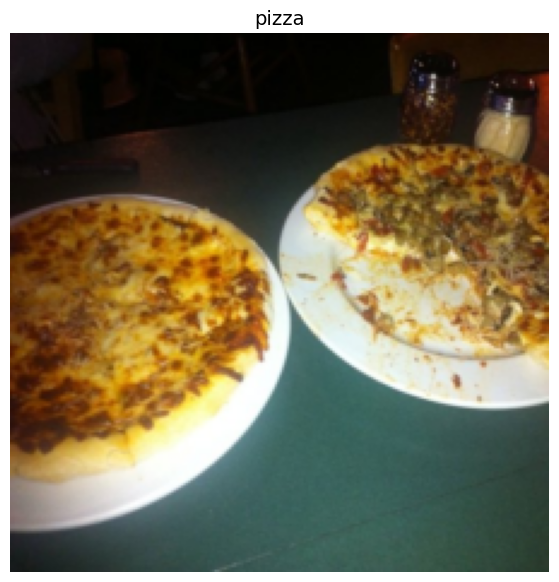

In [968]:
# Rearrange the order dimensions
img_permute = img.permute(1, 2, 0) # works with matplotlib

# Print out different shapes
print(f"Original shape: {img.shape} -> [color_channel, height, width]")
print(f"Permuted shape: {img_permute.shape} -> [height, width, color_channel]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.title(class_names[label], fontsize=14)
plt.axis(False);

In [969]:
# Turn tran and test datasets into DataLoader
from torch.utils.data import DataLoader

# Setup batch size hyperparameter
BATCH_SIZE = 32
NUM_WORKSERS = os.cpu_count()

# Create DataLoader for train
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=NUM_WORKSERS)

# Create DataLoader for test
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=NUM_WORKSERS)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7bad52100df0>,
 <torch.utils.data.dataloader.DataLoader at 0x7baf35aabb20>)

In [970]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [971]:
225 / 32

7.03125

In [972]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, Batch size can be changed preferably
print(f"Image shape: {img.shape} -> [batch_size, color_channel, height, width]")
print(f"Label shape: {label.shape} -> [batch_size]")

Image shape: torch.Size([32, 3, 224, 224]) -> [batch_size, color_channel, height, width]
Label shape: torch.Size([32]) -> [batch_size]


## 5 Option 2: Loading Image Data with a Custom `Dataset`

1. Want to be able to load images form file
2. Want to be able to get class names from the Dataset.
3. Want to be able to get classes as dictionary from the Dataset.

Pros:
* Can create a `Dataset`out of almost anything.
* Not limited to PyTorch pre-built in `Dataset` functions.

Cons:
* Even though you could create `Dataset`out of almost anything, it doesn't mean it will always work....
* Using a custom `Dataset` often results writing more code, which could be prone to errors or performance issues.

All custom datasets in PyTorch, often subclass: - https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset

In [973]:
import os
import pathlib
import torch


from PIL import Image
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from typing import Tuple, Dict, List

In [974]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names

Why this functions?

1. Get the class names using `os.scandir()` to traverse a target directory (ideally the directory is in standard image classification format).
2. Raise an error if the class names aren't found (if this happens, there might be something wrong with the directory structure).
3. Return a dict and list of class names.

In [975]:
# Setup path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get class names from target directory
# from Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [976]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory."""
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names could not be found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check file structure.")

    # 3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}

    return classes, class_to_idx

In [977]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder`

To create own custom dataset, below are points:

1. Subclass `torch.utils.data.Dataset`
2. Init the subclass with a target directory (the directory to get data from) as well as a transform if data should be transformed.
3. Create several attributes:
  * paths - paths of images
  * transform - the transform to be used
  * classes - a list of the target classes
  * class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function to `laad_image()`, this function will open an image
5. Overwrite the `__len__()` method to return the length of the dataset
6. Overwrite the `__getit__ ()` method to return a given sample when passed an index

In [978]:
# 0. Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    # 2. Initialize the custom dataset
    def __init__(self,
                 targ_dir: str,
                 transform=None):
        # 3. Create class attributes
        # Get all of the image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        # Setup transform
        self.transform = transform

        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Get function to load images
    def load_images(self, index: int) -> Image.Image:
        """Opens an image via a path and returns it."""
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. Overwrite __len__()
    def __len__(self) -> int:
        """Returns the length of the dataset."""
        return len(self.paths)

    # 6. Overwrite __getitem__() method to return a particular sample
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        """Returns an image and its target label (X, y)."""
        img = self.load_images(index)

        class_name = self.paths[index].parent.name # expects path in format: dta_folder/class_name/image.jpg
        class_idx = self.class_to_idx[class_name]

        # Transform the image if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [979]:
img, label = train_data[0]
img, label

(tensor([[[0.1137, 0.1176, 0.1255,  ..., 0.1098, 0.1098, 0.1098],
          [0.1176, 0.1137, 0.1137,  ..., 0.1176, 0.1176, 0.1137],
          [0.1137, 0.1176, 0.1098,  ..., 0.1216, 0.1255, 0.1216],
          ...,
          [0.0941, 0.0902, 0.0863,  ..., 0.1725, 0.1725, 0.1804],
          [0.0902, 0.0902, 0.0902,  ..., 0.1647, 0.1686, 0.1686],
          [0.0863, 0.0863, 0.0824,  ..., 0.1490, 0.1529, 0.1529]],
 
         [[0.0706, 0.0745, 0.0824,  ..., 0.0549, 0.0549, 0.0549],
          [0.0745, 0.0706, 0.0706,  ..., 0.0627, 0.0627, 0.0588],
          [0.0706, 0.0784, 0.0667,  ..., 0.0627, 0.0667, 0.0627],
          ...,
          [0.1098, 0.1059, 0.1020,  ..., 0.2353, 0.2314, 0.2314],
          [0.1059, 0.1059, 0.1059,  ..., 0.2275, 0.2314, 0.2314],
          [0.1020, 0.1020, 0.0980,  ..., 0.2196, 0.2235, 0.2235]],
 
         [[0.0941, 0.0980, 0.1059,  ..., 0.0196, 0.0196, 0.0196],
          [0.0980, 0.0941, 0.0941,  ..., 0.0235, 0.0235, 0.0196],
          [0.0941, 0.0980, 0.0902,  ...,

In [980]:
# Create a transform
from torchvision import transforms

data_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.RandomHorizontalFlip(p=0.5),
                                     transforms.ToTensor()
])

test_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor()
])

data_transform, test_transform

(Compose(
     Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
     RandomHorizontalFlip(p=0.5)
     ToTensor()
 ),
 Compose(
     Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
     ToTensor()
 ))

In [981]:
# Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                       transform=data_transform)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                      transform=test_transform)

In [982]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [983]:
len(train_data), len(train_data_custom)

(225, 225)

In [984]:
len(test_data), len(test_data_custom)

(75, 75)

In [985]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [986]:
train_data.classes

['pizza', 'steak', 'sushi']

In [987]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [988]:
train_data_custom[0]

(tensor([[[0.2196, 0.2353, 0.2471,  ..., 0.0667, 0.0745, 0.0824],
          [0.2353, 0.2431, 0.2392,  ..., 0.0667, 0.0745, 0.0824],
          [0.2275, 0.2275, 0.2314,  ..., 0.0706, 0.0667, 0.0745],
          ...,
          [0.4471, 0.4510, 0.4510,  ..., 0.5098, 0.9216, 0.9765],
          [0.4431, 0.4510, 0.4510,  ..., 0.8431, 0.9882, 0.9922],
          [0.4314, 0.4431, 0.4431,  ..., 0.9686, 0.9725, 0.9216]],
 
         [[0.0863, 0.1020, 0.1176,  ..., 0.0392, 0.0471, 0.0549],
          [0.1137, 0.1176, 0.1176,  ..., 0.0392, 0.0471, 0.0549],
          [0.1176, 0.1176, 0.1216,  ..., 0.0431, 0.0392, 0.0471],
          ...,
          [0.3412, 0.3451, 0.3490,  ..., 0.4745, 0.9098, 0.9647],
          [0.3490, 0.3529, 0.3569,  ..., 0.8275, 0.9765, 0.9843],
          [0.3490, 0.3569, 0.3529,  ..., 0.9686, 0.9608, 0.8980]],
 
         [[0.0078, 0.0078, 0.0039,  ..., 0.0000, 0.0078, 0.0157],
          [0.0314, 0.0235, 0.0039,  ..., 0.0000, 0.0078, 0.0157],
          [0.0392, 0.0314, 0.0235,  ...,

In [989]:
# Chek for equality between original ImageFolder Dataset and ImageFolderCustomDataset
print(train_data.classes == train_data_custom.classes)
print(train_data.classes == train_data_custom.classes)

True
True


### 5.3 Create a function to display random images

1. Take in a `Dataset`and a number of other parameters such as class names and how many images to visualize.
2. To prevent the display getting out of hand, let's cap the number of images to see at 10 maximum.
3. Set the random seed for reproducibility.
4. Get a list of random sample indexes from the target dataset.
5. Set a matplotlib plot.
6. Loop through the random sample indexes and plot them with matplotlib.
7. Make sure the dimensions of images line up with matplotlib requirements [HWC instead of CHW].

In [990]:
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    """Displays a random selection of images from a target dataset."""

    # 2. Adjust display if n is too high

    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purpose, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set random seed for reproducibility
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through random indexes and plot them with matplotlib
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust tensor dimensions for plotting
        targ_image_adjust = targ_image.permute(1, 2, 0) # [CHW -> HWC]

        # 8 Plot adjusted image
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis(False)

        if classes:
            title = f"Class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nShape: {targ_image_adjust.shape}"
        plt.title(title, fontsize=14)

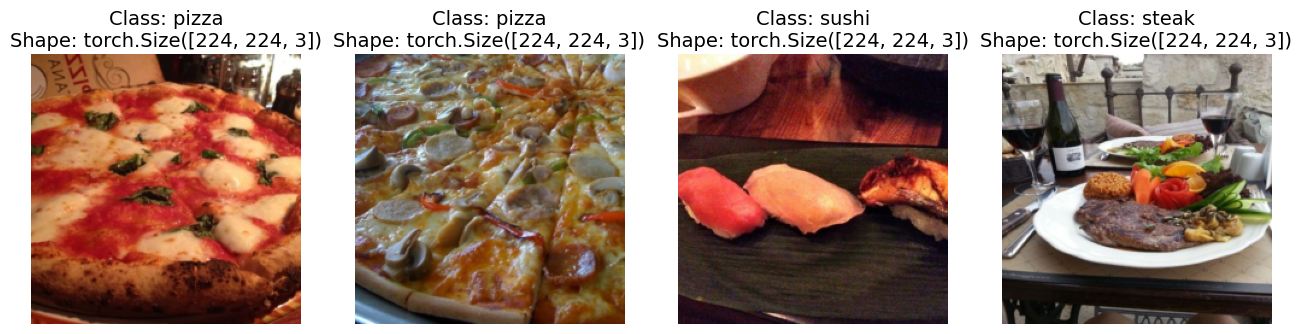

In [991]:
# Display random images from the ImageFolder created dataset
display_random_images(dataset=train_data_custom,
                      classes=train_data.classes,
                      n=4,
                      display_shape=True,
                      seed=None)

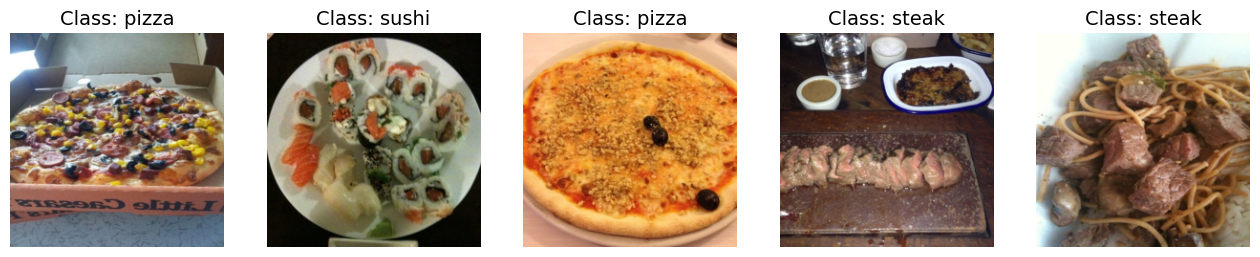

In [992]:
# Display random images from the ImageFolder created dataset
display_random_images(dataset=train_data_custom,
                      classes=train_data.classes,
                      n=5,
                      display_shape=False,
                      seed=None)

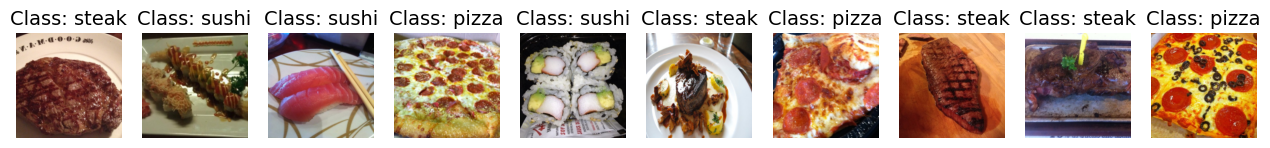

In [993]:
# Display random images from the ImageFolder created dataset
display_random_images(dataset=train_data_custom,
                      classes=train_data.classes,
                      n=10,
                      display_shape=False,
                      seed=None)

For display purpose, n shouldn't be larger than 10, setting to 10 and removing shape display.


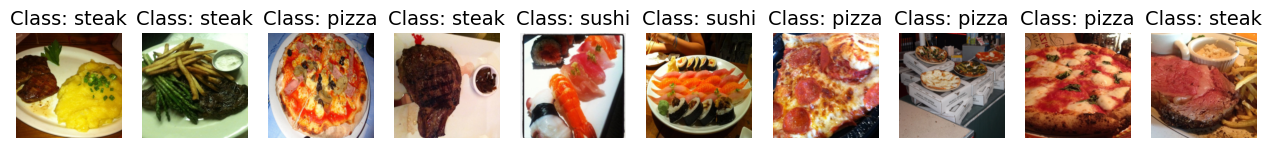

In [994]:
# Display random images from the ImageFolder created dataset
display_random_images(dataset=train_data_custom,
                      classes=train_data.classes,
                      n=25,
                      display_shape=True,
                      seed=None)

In [995]:
# Display random images from the ImageFolder created dataset
display_random_images(dataset=train_data_custom,
                      classes=train_data.classes,
                      n=10,
                      display_shape=True,
                      seed=42)

### 5.4 Turn custom loaded images into `DataLoader`


In [996]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7baf3669db10>,
 <torch.utils.data.dataloader.DataLoader at 0x7baf3669e110>)

In [997]:
os.cpu_count()

2

In [998]:
# Get image and label from custom Loader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Print out the shapes
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

## 6. Other forms of transforms (data augmentsation)

Data augmentation is the process of artificially adding diversity to your training data.

In the case of the image data, this may mean applying various imae transformations to the traiing images.

This practice hopefully results in a model that's more generalizable to unseen data.

Take a look at one particular type of data augmentation used to train PyTorch vision models to state of the art levels....

Blog post: https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/#break-down-of-key-accuracy-improvement

Example below uses: https://pytorch.org/vision/main/generated/torchvision.transforms.TrivialAugmentWide.html

In [999]:
# Looking at how the trivialaugment - https://pytorch.org/vision/main/generated/torchvision.transforms.TrivialAugmentWide.html
from torchvision import transforms

train_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()
])

test_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor()
])

train_transform, test_transform

(Compose(
     Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
     TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
     ToTensor()
 ),
 Compose(
     Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
     ToTensor()
 ))

In [1000]:
# Get all image paths
train_image_list = list(image_path.glob("*/*/*.jpg"))
train_image_list[:10]

[PosixPath('data/pizza_steak_sushi/train/pizza/1654444.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/715169.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2121603.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/618348.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2702825.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/220190.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2569760.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2785084.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1947572.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3860002.jpg')]

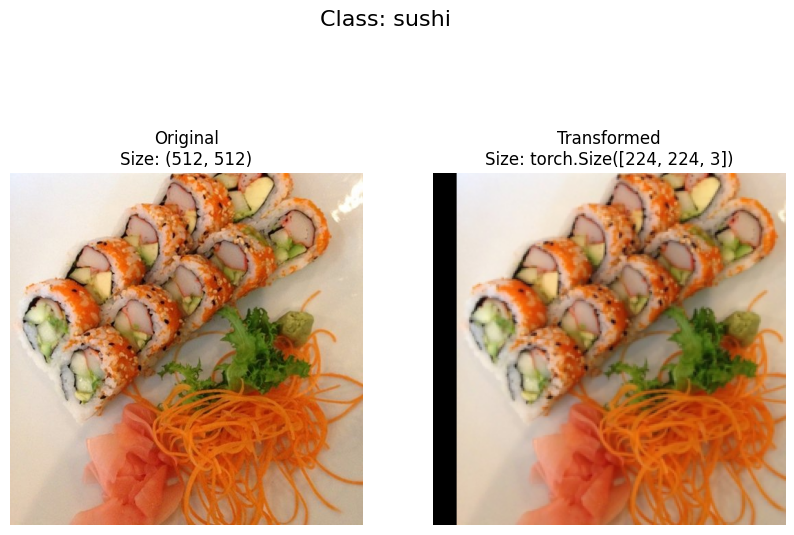

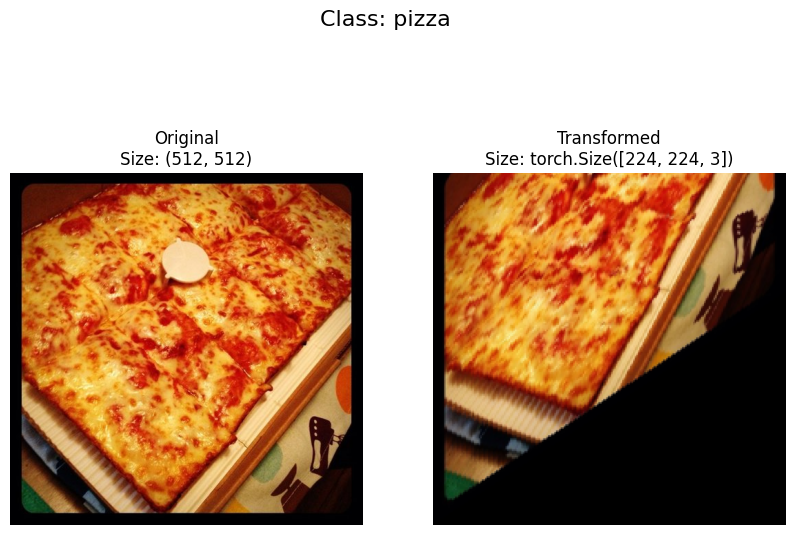

In [1001]:
# plot random transformed images
plot_transformed_images(image_path=image_path_list,
                        transform=train_transform,
                        n=2,
                        seed=None
)

## 7. Model 0: TinyVGG without data augmentation

This replicates the TinyVGG architecture from the CNN Explainer website: https://poloclub.github.io/cnn-explainer/  


In [1002]:
from torchvision import models

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 7.1 Creating transforms and loading data for Model 0

In [1003]:
# Create simple transform
simple_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                       transforms.ToTensor()
])


In [1004]:
# 1. Load and transform data
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_dir,
                                  transform=simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                 transform=simple_transform)

# 2. Turn the datasets into DataLoaders
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Create Dataloader's
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

In [1005]:
# Subclass nn.Module
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:

        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                      stride=2) # default stride value is same as kernel_size
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                      stride=2) # default stride value is same as kernel_size
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*53*53,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benefits from operator fusion: https://horace.io/brrr_intro.html

In [1006]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Setup model with hyperparameters
model_0 = TinyVGG(input_shape=3, # number of color channels in the image data
                  hidden_units=32,
                  output_shape=len(train_data_simple.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=89888, out_features=3, bias=True)
  )
)

In [1007]:
89888/32

2809.0

In [1008]:
import math
root = math.sqrt(2809)
root

53.0

In [1009]:
root = 2809**0.5
root

53.0

### 7.3 Try a forward pass on a single image (to test the model)

In [1010]:
# Get a single image batch
image_class_batch, label_batch = next(iter(train_dataloader_simple))
image_class_batch.shape, label_batch.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [1011]:
# Try a forward pass
model_0(image_class_batch.to(device))

tensor([[ 1.0737e-02, -7.8013e-04,  5.9229e-03],
        [ 1.2187e-02, -9.4569e-05,  7.8061e-03],
        [ 1.0469e-02,  1.9023e-03,  5.3650e-03],
        [ 1.2394e-02, -7.4922e-04,  3.3780e-03],
        [ 1.2385e-02,  2.0539e-03,  4.8244e-03],
        [ 1.3663e-02,  1.0062e-03,  6.0492e-03],
        [ 1.2530e-02,  3.1554e-03,  4.7120e-03],
        [ 1.2425e-02,  8.2941e-04,  5.8085e-03],
        [ 1.0021e-02, -2.4660e-03,  6.3881e-03],
        [ 1.2611e-02, -5.6101e-04,  4.1745e-03],
        [ 1.3257e-02,  1.9822e-03,  8.2284e-03],
        [ 9.2824e-03, -7.2248e-04,  8.7022e-03],
        [ 1.2457e-02, -3.6502e-04,  7.1719e-03],
        [ 1.1217e-02,  3.3274e-04,  8.2283e-03],
        [ 1.1849e-02,  5.5225e-04,  5.9845e-03],
        [ 1.2887e-02,  6.9834e-04,  6.9688e-03],
        [ 1.3514e-02,  2.4119e-03,  6.9101e-03],
        [ 1.4331e-02,  6.9899e-04,  4.4788e-03],
        [ 1.1060e-02, -8.6730e-04,  6.6712e-03],
        [ 1.3585e-02,  2.9847e-03,  3.2972e-03],
        [ 1.2063e-02

### 7.4 Use `torchinfo`to get an idea of the shapes going through the model

In [1012]:
# Install torchinfo, import if it's available
try:
    import torchinfo
except:
    !pip install torchinfo

from torchinfo import summary
summary(model_0, input_size=(1, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 32, 110, 110]         --
│    └─Conv2d: 2-1                       [1, 32, 222, 222]         896
│    └─ReLU: 2-2                         [1, 32, 222, 222]         --
│    └─Conv2d: 2-3                       [1, 32, 220, 220]         9,248
│    └─ReLU: 2-4                         [1, 32, 220, 220]         --
│    └─MaxPool2d: 2-5                    [1, 32, 110, 110]         --
├─Sequential: 1-2                        [1, 32, 53, 53]           --
│    └─Conv2d: 2-6                       [1, 32, 108, 108]         9,248
│    └─ReLU: 2-7                         [1, 32, 108, 108]         --
│    └─Conv2d: 2-8                       [1, 32, 106, 106]         9,248
│    └─ReLU: 2-9                         [1, 32, 106, 106]         --
│    └─MaxPool2d: 2-10                   [1, 32, 53, 53]           --
├─Seq

### 7.5 Create train and test loops functions

  * `train_steps()` - Takes in a model and dataloader and trains the model on the dataloader.
  * `test_steps()` - Takes in a model and dataloader and evaluates the model on the dataloader.

In [1013]:
# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device):

    # Put the model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to the target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate the Loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # calculate accuracy metrics
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [1014]:
# Create a test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):

    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference mode
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to the target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate the loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

### 7.6 Createing a `train()` function to combine `train_steps()` and `test_step()`

In [1015]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloader + loss function
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 9,
          device = device):

    # 2. Setup results dictionary
    results = {
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)

        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        # 4. Print out what's happening
        print(f"Epoch: {epoch+1} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

### 7.7 Train and evaluate model 0

In [1016]:
# Set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 9

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels of the target images
                  hidden_units=32,
                  output_shape=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.01)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long the model train and evaluation took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 1 | Train loss: 15.8530 | Train acc: 0.3555 | Test loss: 1.3106 | Test acc: 0.5417
Epoch: 2 | Train loss: 1.1933 | Train acc: 0.3594 | Test loss: 1.1077 | Test acc: 0.1979
Epoch: 3 | Train loss: 1.0886 | Train acc: 0.4141 | Test loss: 1.1339 | Test acc: 0.1979
Epoch: 4 | Train loss: 1.0081 | Train acc: 0.4141 | Test loss: 1.4495 | Test acc: 0.1979
Epoch: 5 | Train loss: 1.0734 | Train acc: 0.4023 | Test loss: 1.1023 | Test acc: 0.2292
Epoch: 6 | Train loss: 0.9026 | Train acc: 0.4727 | Test loss: 1.0882 | Test acc: 0.3826
Epoch: 7 | Train loss: 0.9762 | Train acc: 0.5391 | Test loss: 0.9865 | Test acc: 0.4233
Epoch: 8 | Train loss: 0.9475 | Train acc: 0.4922 | Test loss: 0.9949 | Test acc: 0.4640
Epoch: 9 | Train loss: 0.8202 | Train acc: 0.6797 | Test loss: 0.9765 | Test acc: 0.5038
Total training time: 16.985 seconds


In [1017]:
model_0_results

{'train_loss': [15.85304643213749,
  1.1933235973119736,
  1.0886164754629135,
  1.0081285946071148,
  1.0733808428049088,
  0.9025713470764458,
  0.9762491881847382,
  0.9474855735898018,
  0.8201757818460464],
 'train_acc': [0.35546875,
  0.359375,
  0.4140625,
  0.4140625,
  0.40234375,
  0.47265625,
  0.5390625,
  0.4921875,
  0.6796875],
 'test_loss': [1.3105542957782745,
  1.1077402830123901,
  1.1338738600413005,
  1.4494564930597942,
  1.102259357770284,
  1.0882017413775127,
  0.9865011970202128,
  0.9949377377827963,
  0.9764642914136251],
 'test_acc': [0.5416666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.22916666666666666,
  0.38257575757575757,
  0.4232954545454546,
  0.46401515151515155,
  0.5037878787878788]}

### 7.8 Plot the loss curves of Model 0

A **loss cuver** is a plot of the loss function against the number of epochs. It's a way of tracking the model progress over time.and

A good guide for different loss curves can be seen here: https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic

In [1018]:
# Get the model_0_results key
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [1019]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Returns separate loss curves for training and testing metrics from the results dictionary."""

    # Get the loss values of the results dictionary (training and test)
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    # Figure out how many epochs there were
    epochs = range(len(results["train_loss"]))

    # Set up a plot
    plt.figure(figsize=(15, 7))

    # Plot the loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot the accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_acc")
    plt.plot(epochs, test_accuracy, label="test_acc")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

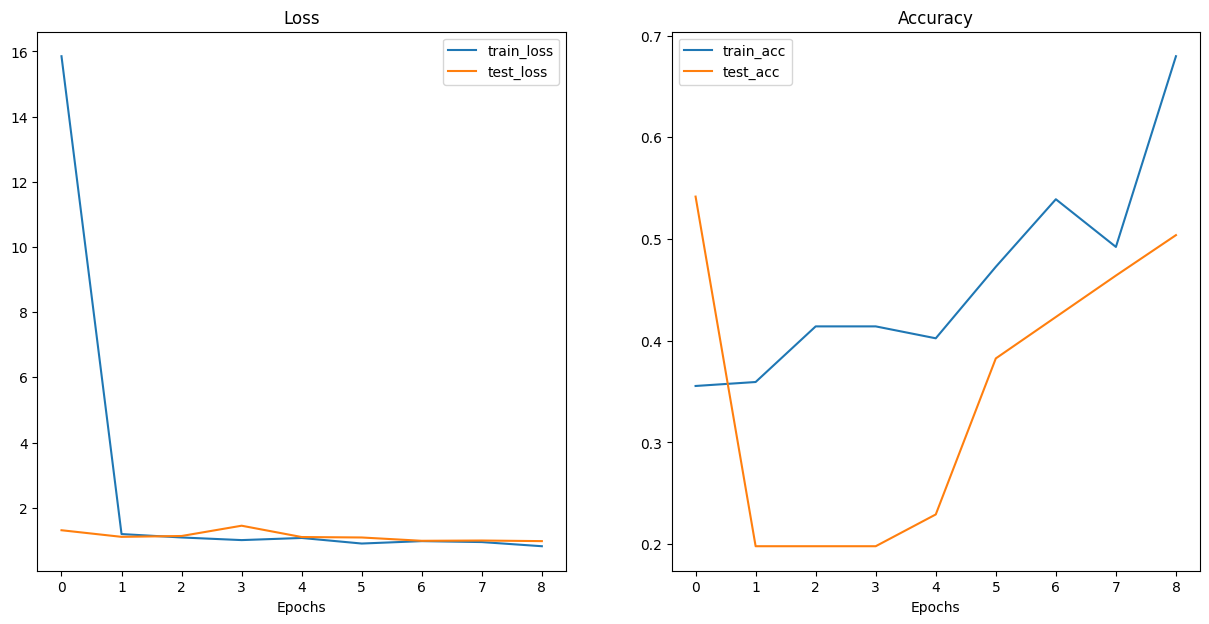

In [1020]:
plot_loss_curves(model_0_results)

## 8. What should an ideal loss curve look like?

https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic

A loss curve is one of the most helpful ways to troubleshoot a model.

## 9. Model 1: TinyVGG with Data Augmentation

This is experiementing using the same model as before with some data augmentation.

### 9.1 Create transform with data augmentation

In [1021]:
# Create training transform with TrivialAugment
from torchvision import transforms

train_transform_trivial = transforms.Compose([transforms.Resize(size=(224, 224)),
                                              transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                              transforms.ToTensor()
])

# Create testing transform
test_transform_simple = transforms.Compose([transforms.Resize(size=(224, 224)),
                                            transforms.ToTensor()
])

### 9.2 Create train and test `Datasets` and `DataLoaders` with data augmentation

In [1022]:
# Turn image folders into Datasets
from torchvision import datasets

train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)

In [1023]:
# Turn Datasets into DataLoaders
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Seed for reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Create DataLoaders
train__dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                         batch_size=BATCH_SIZE,
                                         shuffle=True,
                                         num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

### 9.3 Construct and train model 1

This time will be using same model architecture except this for augmented training data.

In [1024]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = TinyVGG(input_shape=3,
                  hidden_units=32,
                  output_shape=len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=89888, out_features=3, bias=True)
  )
)

Wonderful, now the model and dataloaders are ready to train. After a loss function and an optimizer are prepared.

In [1025]:
# Set reproducibility environment
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
NUM_EPOCHS = 9

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.01)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train__dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

# End the timer and print out how long the model train
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 1 | Train loss: 12.9757 | Train acc: 0.3945 | Test loss: 15.5818 | Test acc: 0.2917
Epoch: 2 | Train loss: 2.9016 | Train acc: 0.3008 | Test loss: 1.1055 | Test acc: 0.1979
Epoch: 3 | Train loss: 1.0957 | Train acc: 0.4023 | Test loss: 1.1109 | Test acc: 0.2604
Epoch: 4 | Train loss: 1.0974 | Train acc: 0.3047 | Test loss: 1.1149 | Test acc: 0.2604
Epoch: 5 | Train loss: 1.0927 | Train acc: 0.4258 | Test loss: 1.1200 | Test acc: 0.2604
Epoch: 6 | Train loss: 1.0970 | Train acc: 0.3047 | Test loss: 1.1235 | Test acc: 0.2604
Epoch: 7 | Train loss: 1.0955 | Train acc: 0.3047 | Test loss: 1.1274 | Test acc: 0.2604
Epoch: 8 | Train loss: 1.0937 | Train acc: 0.2812 | Test loss: 1.1314 | Test acc: 0.1979
Epoch: 9 | Train loss: 1.1126 | Train acc: 0.3086 | Test loss: 1.1335 | Test acc: 0.2604
Total training time: 19.205 seconds


### 9.4 Plot the loss curves of model_1

A loss curve helps in evaluating models performance overtime.

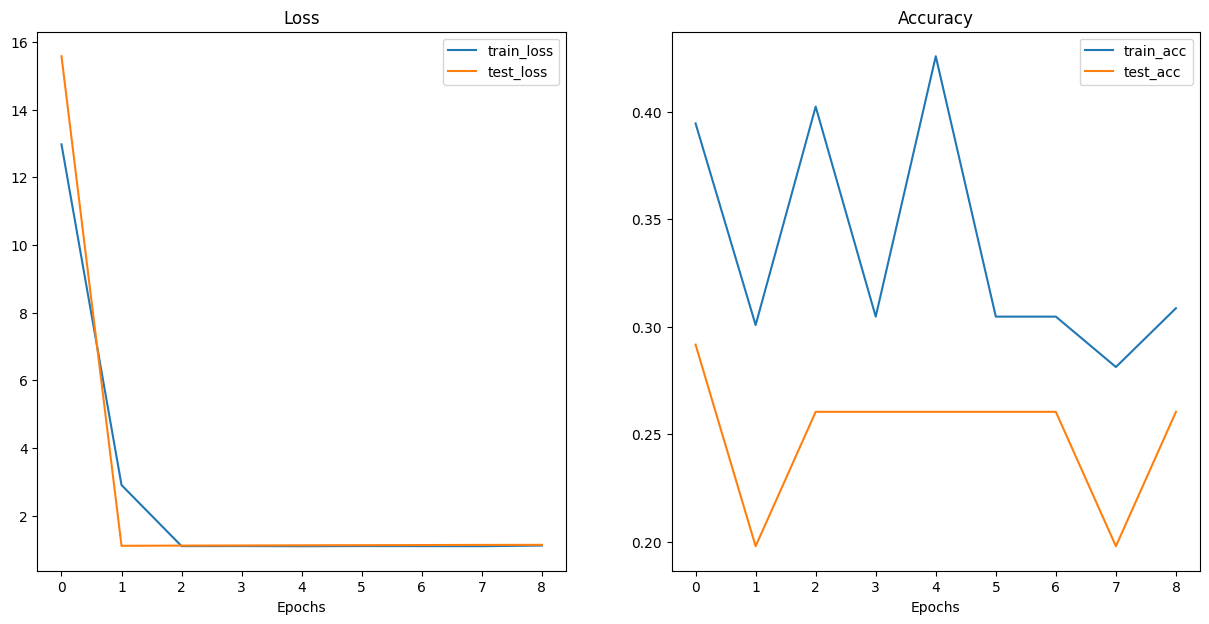

In [1026]:
plot_loss_curves(model_1_results)

## 10. Compare model results

After evaluating the modelling experiments on the two models, it's important to compare them to each other.

There's a few different ways to do so:

    1. Hard coding (what similar coding used building the models).
    2. PyTorch + Tensorboard - https://pytorch.org/docs/stable/tensorboard.html
    3. Weights & Biases - https://wandb.ai/experiment-tracking
    4. MLFlow - https://mlflow.org/

In [1027]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming model_0_results and model_1_results are dictionaries with lists of train_loss values

# Convert the results dictionaries to dataframes
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

In [1028]:
display(model_0_df)
display(model_1_df)

train_loss  train_acc  test_loss  test_acc
0   15.853046   0.355469   1.310554  0.541667
1    1.193324   0.359375   1.107740  0.197917
2    1.088616   0.414062   1.133874  0.197917
3    1.008129   0.414062   1.449456  0.197917
4    1.073381   0.402344   1.102259  0.229167
5    0.902571   0.472656   1.088202  0.382576
6    0.976249   0.539062   0.986501  0.423295
7    0.947486   0.492188   0.994938  0.464015
8    0.820176   0.679688   0.976464  0.503788

train_loss  train_acc  test_loss  test_acc
0   12.975707   0.394531  15.581846  0.291667
1    2.901608   0.300781   1.105492  0.197917
2    1.095689   0.402344   1.110894  0.260417
3    1.097426   0.304688   1.114937  0.260417
4    1.092704   0.425781   1.119971  0.260417
5    1.096964   0.304688   1.123492  0.260417
6    1.095501   0.304688   1.127361  0.260417
7    1.093704   0.281250   1.131411  0.197917
8    1.112554   0.308594   1.133468  0.260417

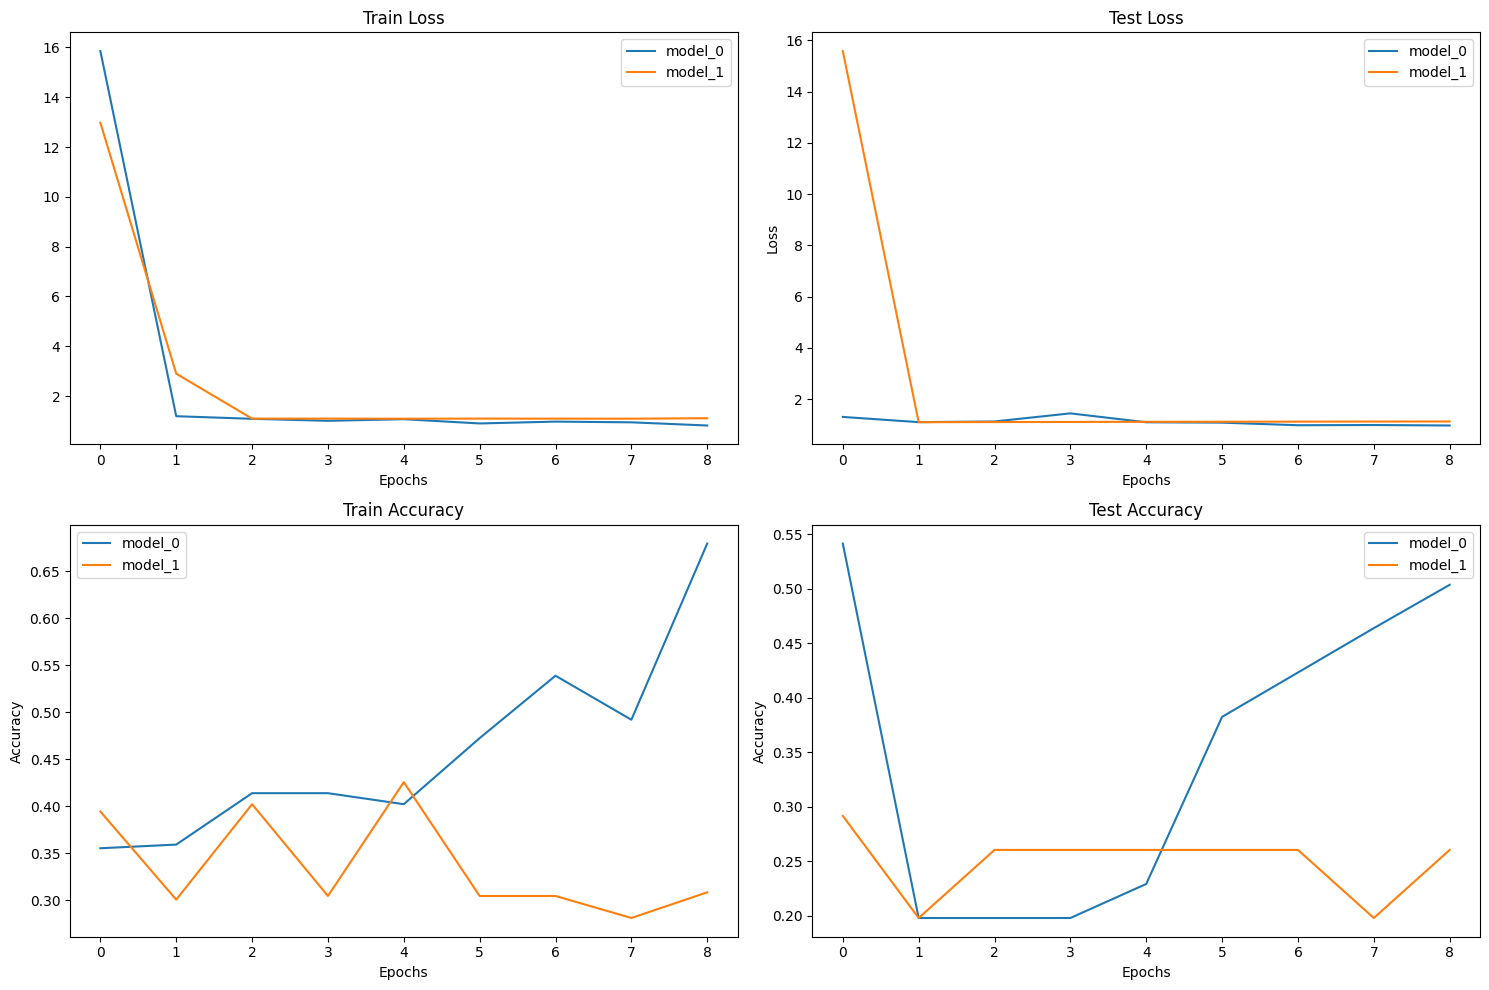

In [1029]:
# Determine the number of epochs based on the length of the train_loss columns
num_epochs = len(model_0_df["train_loss"])

# Create the epochs list
epochs = range(num_epochs)

# Setup a plot
plt.figure(figsize=(15, 10))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="model_0")
plt.plot(epochs, model_1_df["train_loss"], label="model_1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="model_0")
plt.plot(epochs, model_1_df["test_loss"], label="model_1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="model_0")
plt.plot(epochs, model_1_df["train_acc"], label="model_1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="model_0")
plt.plot(epochs, model_1_df["test_acc"], label="model_1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

## 11. Making a prediction on a custom image

Although models are trained on custom data.... how to make predictions on a sample/image that's not in either traiing or testing dataset.

In [1030]:
import requests
import torchvision
from pathlib import Path

# Setup data path
data_path = Path("data")
data_path.mkdir(parents=True, exist_ok=True)

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download....")

data/04-pizza-dad.jpeg already exists, skipping download....


In [1031]:
# https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg

In [1032]:
# https://stock.adobe.com/images/set-of-sushi-and-maki-with-soy-sauce-over-blue-stone-background-top-view-with-copy-space/323880492

### 11.1 Loading in a custom image with PyTorch

It's important to make sure the custom image is in the same format as the training data.

* In tensor form with datatype (torch.float32)
* On shape (1, 3, 224, 224)
* On the right device

Read more: -
https://pytorch.org/vision/stable/generated/torchvision.io.read_image.html#torchvision.io.read_image

In [1033]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
print(f"Custom image tensor:\n {custom_image_uint8}")
print(f"Custom image shape: {custom_image_uint8.shape}")
print(f"Custom image datatype: {custom_image_uint8.dtype}")

Custom image tensor:
 tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
Custom image shape: torch.Size([3, 4032, 3024])
Custom image data

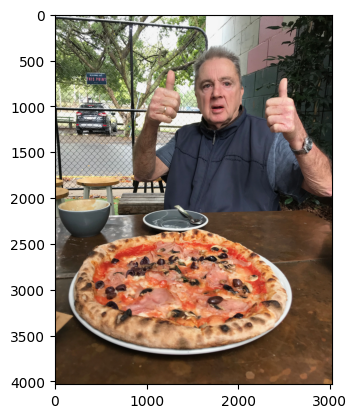

In [1034]:
plt.imshow(custom_image_uint8.permute(1, 2, 0))

### 11.2 Making a prediction on a custom image with a trained PyTorch model

In [1035]:
# Try to make a prediction on an image in uint8 format(with a TypeError 'Tensor")
# model_0.eval()
# with torch.inference_mode():
#     model_0(custom_image_uint8(device))

In [1036]:
# Load in the custom image and convert to torch.float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 225.0
custom_image.shape

torch.Size([3, 4032, 3024])

In [1037]:
print(f"Custom image shape: {custom_image_uint8.shape}")
print(f"New Custom image shape: {custom_image.shape}")
print(f"Custom image datatype: {custom_image_uint8.dtype}")
print(f"New Custom image datatype: {custom_image.shape}")

Custom image shape: torch.Size([3, 4032, 3024])
New Custom image shape: torch.Size([3, 4032, 3024])
Custom image datatype: torch.uint8
New Custom image datatype: torch.Size([3, 4032, 3024])


In [1038]:
# CReate transform pipeline to resize image
from torchvision import transforms

custom_image_transform = transforms.Compose([
                                            transforms.Resize(size=(224, 224))
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out the shapes
print(f"Original shape: {custom_image.shape}")
print(f"Transformed shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
Transformed shape: torch.Size([3, 224, 224])


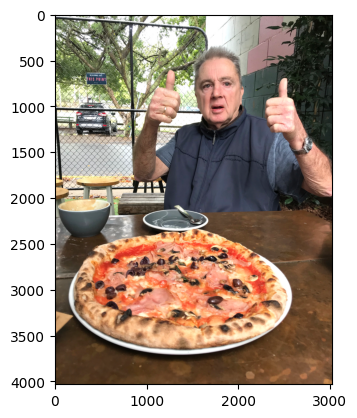

In [1039]:
plt.imshow(custom_image.permute(1, 2, 0))

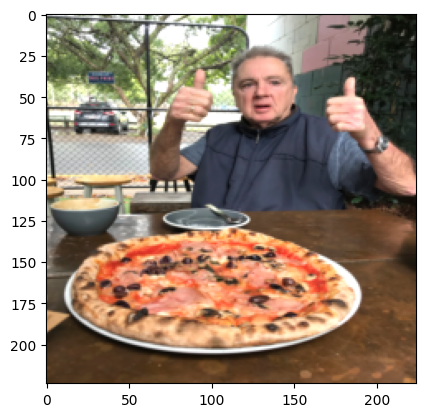

In [1040]:
plt.imshow(custom_image_transformed.permute(1, 2, 0))

In [1041]:
# model_0.eval()
# with torch.inference_mode():
#     custom_image_pred = model_0(custom_image_transformed.to(device))

In [1042]:
89888/2809

32.0

In [1043]:
custom_image_transformed.shape, custom_image_transformed.unsqueeze(0).shape

(torch.Size([3, 224, 224]), torch.Size([1, 3, 224, 224]))

In [1044]:
# this model version expects to work as the batch size ... added
model_0.eval()
with torch.inference_mode():
    custom_image_pred = model_0(custom_image_transformed.unsqueeze(0).to(device))
custom_image_pred

tensor([[ 0.2453, -0.2654, -0.3530]], device='cuda:0')

Note, to make a prediction on a custom image follow:
* Load the image and turn it into tensor
* Make sure the image was the same datatype as the model (torch.float32)
* Make sure the image was the same shape as the data the model was trained on (224, 224, 3) with a batch size .....(1, 3, 224, 224)
* Make sure the image was on the same device as the trained model

In [1045]:
# Convert logits -> prediction probabilities
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.4652, 0.2791, 0.2557]], device='cuda:0')

In [1046]:
# Convert prediction probabilities -> prediction labels
custom_image_pred_labels = torch.argmax(custom_image_pred_probs, dim=1)
custom_image_pred_labels

tensor([0], device='cuda:0')

In [1047]:
class_names[custom_image_pred_labels]

'pizza'

In [1048]:
class_names

['pizza', 'steak', 'sushi']

### 11.3 Putting custom image prediction together: building a function

Ideal outcome:

A function where we pass an image path to and have our model predict on that image and plot the image

In [1049]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device=device):
    """Make a prediction on a target image with a trained model and plots the image with the predicted class name."""

    # Load in the image
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # Normalize the image pixel values by dividing 255 to get them between [0, 1]
    target_image = target_image / 255.0

    # Transform if necessary
    if transform:
        target_image = transform(target_image)

    # Make sure the model is on the target device
    model.to(device)

    # Turn on eval/inference mode and make a prediction
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image (this is the batch dimension, e.g. the model will predict on batches of 1x image)
        target_image = target_image.unsqueeze(0)

        # Make a prediction on the image with an extra dimension
        target_image_pred = model(target_image.to(device)) # make sure the taret image is on the right device

    # Convert logits -> to the prediction probabilities
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # Plot the image alongside the prediction and predicton probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # remove batch dimension and rearrange shape to be HWC
    # Image labels
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max():.3f}"
    plt.title(title)
    plt.axis(False);

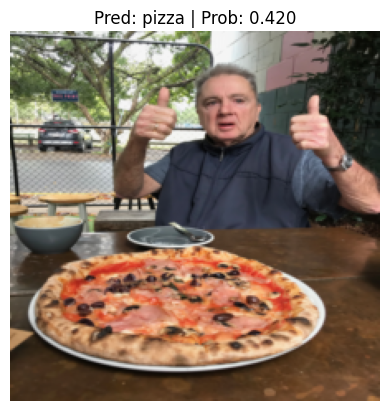

In [1050]:
# Pred on our custom image
pred_and_plot_image(model=model_0,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

In [1051]:
64 * 3

192

In [1052]:
24216480/89888

269.4072623709505